In [11]:
import pandas as pd

data = pd.read_csv('../../data/iris_data.csv', decimal=",")
data = data.drop(['Petal length', 'Petal width'], axis=1)
data

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [3]:
labelList = data.Species.unique()
labelList

NameError: name 'data' is not defined

NameError: name 'labelList' is not defined

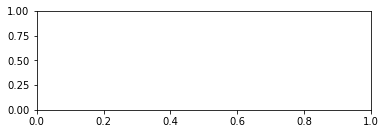

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(211)

colors = {labelList[0] : 'blue', labelList[1] : 'green', labelList[2] : 'red'}

def generateColors(speciesList):
    colorList = []
    for spec in speciesList:
        colorList.append(colors[spec])
    return colorList

#ax.scatter(data['Sepal length'], data['Sepal width'], c=data['Species'].apply(lambda x: colors[x]))
#generateColors(data['Species'])
ax.scatter(data['Sepal length'], data['Sepal width'], c=generateColors(data['Species']))

In [7]:
from sklearn import preprocessing
from sklearn.cluster import MeanShift, estimate_bandwidth

#No reason to encode Species as we don't want it in our data.
label_enc = preprocessing.LabelEncoder()
data['Species'] = label_enc.fit_transform(data['Species'].astype(str))

#We're dropping it instead
data = data.drop(['Species'], axis=1)

#cleaning data from nonsensical data entries
bool_matrix = data.isnull()
only_null_filter = bool_matrix.any(axis=1)
missing = data[only_null_filter]
data = data.dropna()

data

NameError: name 'data' is not defined

In [8]:
est_band = estimate_bandwidth(data, quantile=0.24) # quantile, trial and error mht. at finde en værdi som giver et resultat der giver mening
est_band

NameError: name 'data' is not defined

In [9]:
analyzer = MeanShift(bandwidth=est_band, bin_seeding=True)
analyzer.fit(data)

NameError: name 'est_band' is not defined

In [12]:
labels = analyzer.labels_
clusters = np.unique(labels)
n_clusters = len(clusters)
cluster_centers = analyzer.cluster_centers_

print(labels)
print('\n\n', clusters)
print('Number of clusters: ', n_clusters)
print('\n\n', cluster_centers)

NameError: name 'analyzer' is not defined

In [13]:
from itertools import cycle

#fig = plt.figure()
ax2 = fig.add_subplot(212)
colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]

    x, y = data.to_numpy()[my_members,0], data.to_numpy()[my_members,1]
    ax2.scatter(x, y, c=col, linewidth=0.2)
    ax2.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)


#Sammenligningen fortæller os at vores meanshift model giver et resultat, meget tæt på virkeligheden.
fig

NameError: name 'n_clusters' is not defined

In [14]:
#Her prøver vi med quantile 0.15

est_band = estimate_bandwidth(data, quantile=0.15)
analyzer = MeanShift(bandwidth=est_band, bin_seeding=True)
analyzer.fit(data)
labels = analyzer.labels_
clusters = np.unique(labels)
n_clusters = len(clusters)
cluster_centers = analyzer.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111)
colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]

    x, y = data.to_numpy()[my_members,0], data.to_numpy()[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)

ValueError: could not convert string to float: 'I. setosa'